In [4]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=9e8d30588f75c1a95af565e5c83782903e8f1f1441ecbdb14723b53883cb2dc6
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [5]:
import os
import cv2     # for capturing videos
import math
import geocoder
import requests
%matplotlib inline
import pandas as pd
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from tensorflow.python.keras.utils import np_utils
#from keras.utils import np_utils
from matplotlib import pyplot as plt
from skimage.transform import resize   # for resizing images

In [9]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


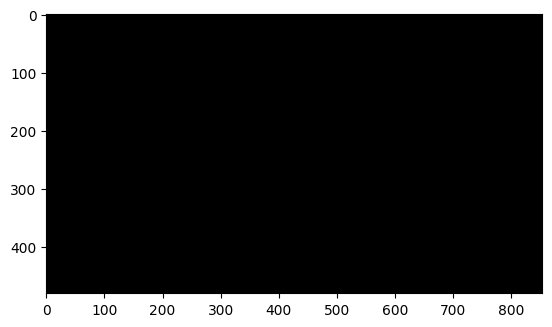

In [10]:
img = plt.imread('0.jpg')   # reading image using its name
plt.imshow(img)

In [11]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [12]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [13]:
y = data.Class
dummy_y = np_utils.to_categorical(y)

In [14]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [15]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [17]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [18]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 41s 10s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [20]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [21]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [22]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25693186 (98.01 MB)
Trainable params: 25693186 (98.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 5s 903ms/step - loss: 0.8219 - accuracy: 0.5677 - val_loss: 0.7768 - val_accuracy: 0.7313
Epoch 2/100
5/5 [==============================] - 3s 511ms/step - loss: 0.3022 - accuracy: 0.8710 - val_loss: 0.8024 - val_accuracy: 0.6418
Epoch 3/100
5/5 [==============================] - 2s 506ms/step - loss: 0.1883 - accuracy: 0.9226 - val_loss: 0.8476 - val_accuracy: 0.7015
Epoch 4/100
5/5 [==============================] - 3s 518ms/step - loss: 0.1137 - accuracy: 0.9742 - val_loss: 0.8366 - val_accuracy: 0.7015
Epoch 5/100
5/5 [==============================] - 3s 513ms/step - loss: 0.0727 - accuracy: 0.9935 - val_loss: 0.8428 - val_accuracy: 0.7164
Epoch 6/100
5/5 [==============================] - 4s 823ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.8330 - val_accuracy: 0.7463
Epoch 7/100
5/5 [==============================] - 3s 524ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.8410 - val_accuracy: 0.7612
Epoch 8/100
5

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [28]:
test = pd.read_csv('test.csv')

In [29]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [30]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [31]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 5s 5s/step


(9, 7, 7, 512)

In [32]:
test_image = test_image.reshape(9, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [33]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 135ms/step


In [34]:
print(predictions)

[[7.7250452e-06 9.9999219e-01]
 [4.4599362e-04 9.9955398e-01]
 [3.8201769e-03 9.9617982e-01]
 [2.2552032e-03 9.9774480e-01]
 [7.7998196e-03 9.9220014e-01]
 [7.5079292e-01 2.4920708e-01]
 [9.0144116e-01 9.8558821e-02]
 [7.8249890e-01 2.1750122e-01]
 [9.3147069e-01 6.8529338e-02]]


In [35]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")


No Accident
No Accident
No Accident
No Accident
No Accident
Accident
Accident
Accident
Accident


In [40]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid = #Enter Your account sid
auth_token = #Enter your auth token
client = Client(account_sid, auth_token)

SyntaxError: invalid syntax (<ipython-input-40-f3d9b8539080>, line 4)

In [39]:
cap = cv2.VideoCapture('Accident-1.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
                 body="Accident detected in "
    )

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
